# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [4]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

#1)
print("Sales > 10:\n{}\n".format(sales[sales["sales"] > 10]))

#2)
print("Year == 2018:\n{}\n".format(sales[sales["year"] == 2018]))

#3)
print("Year == 2018 and Sales > 3:\n{}\n".format(sales[(sales["year"] == 2018)  &  (sales["sales"] > 3)]))

#4)
print("!(Year == 2018 and Sales > 13):\n{}\n".format(sales[~((sales["year"] == 2018)  &  (sales["sales"] > 13))]))

#5)
print("(Sales/ 3) > 3:\n{}\n".format(sales[(sales["sales"] / 3 > 3)]))

#6)
print("Employees > j:\n{}\n".format(sales[(sales["employee"].str.upper() > "J")]))

Sales > 10:
  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020

Year == 2018:
  employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018

Year == 2018 and Sales > 3:
  employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018

!(Year == 2018 and Sales > 13):
     employee  sales  year
1      Guanyu     17  2019
2         Jan      6  2020
3       Roman     12  2018
4  Jacqueline      8  2020
5       Paola      3  2019
6   Esperanza      7  2019
7      Alaina     15  2020
8      Egweyn      5  2020

(Sales/ 3) > 3:
  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020

Employees > j:
     employee  sales  year
0     Katrina     14  2018
2         Jan      6  2020
3       Roman     12  2018
4  Jacqueline      8  2020
5       Paola      3  2019



# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
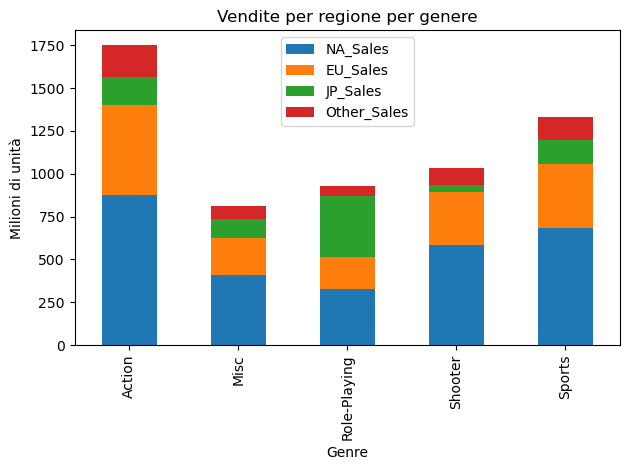


Videogames Published:16598



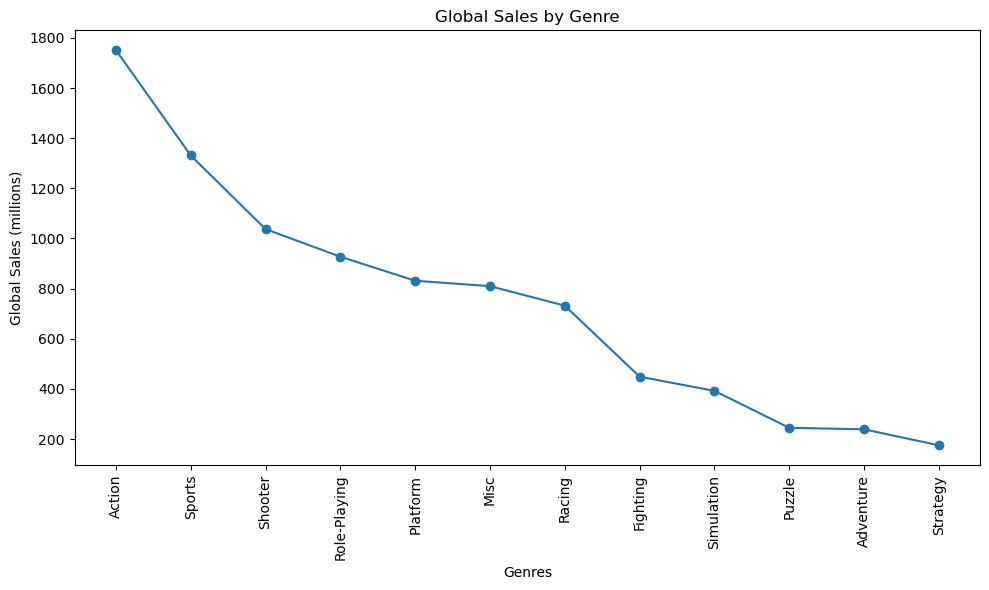

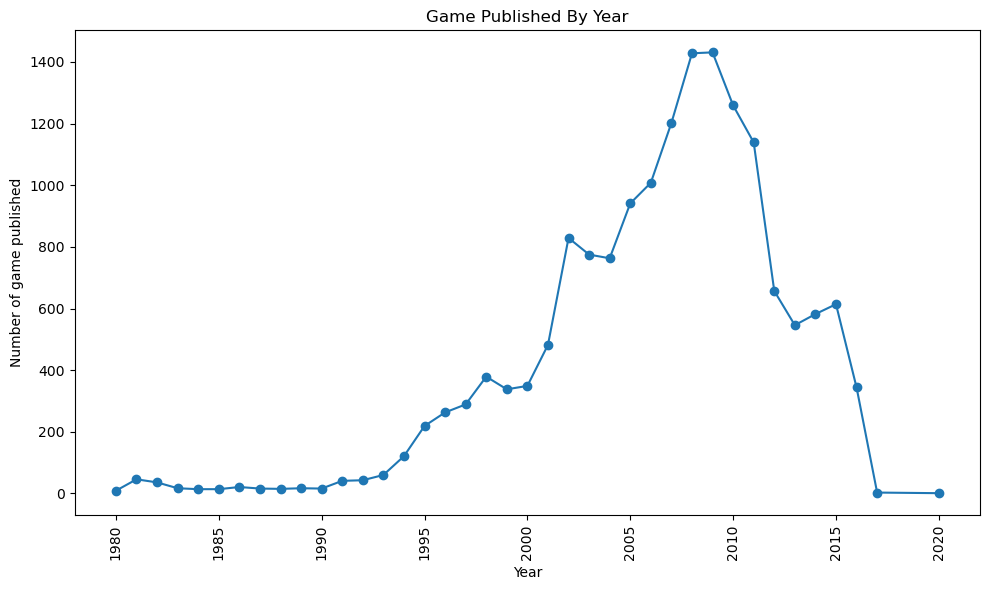

<Figure size 1000x600 with 0 Axes>

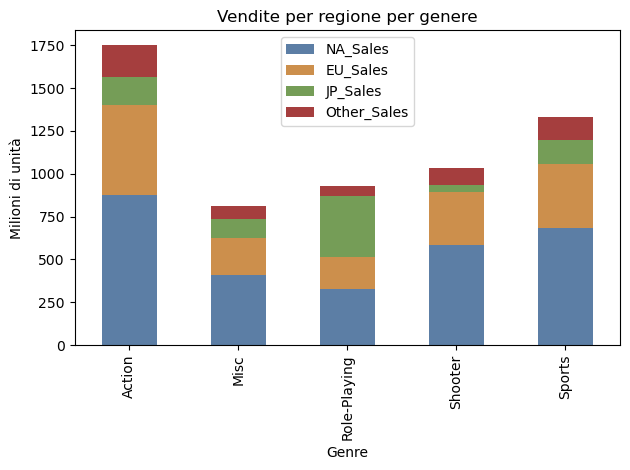

In [1]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

#1) 
print("Videogames Published:{}\n".format(df["Name"].count()))

#2)
sales_by_genre = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(sales_by_genre.index, sales_by_genre.values, marker='o')
plt.xlabel('Genres')
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales by Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#3)
game_published_by_year = df.groupby("Year")["Name"].count()

plt.figure(figsize=(10, 6))
plt.plot(game_published_by_year.index, game_published_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of game published')
plt.title('Game Published By Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#4)
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

desired_order = ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
genre_sales = genre_sales.reindex(desired_order)

plt.figure(figsize=(10, 6))

genre_sales.sort_values(by="Genre", ascending=True).plot(kind='bar', stacked=True, color=['#5c7ea5', '#cc8f4c', '#759d57', '#a53e3e'])

plt.title('Vendite per regione per genere')
plt.xlabel('Genre')
plt.ylabel('Milioni di unità')
plt.xticks(rotation=90)
plt.legend(title='', loc='upper center')

plt.tight_layout() 
plt.show()
